In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython import display
import seaborn as sns
import csv

In [23]:
df = pd.read_csv('startup.csv')

In [24]:
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121


In [25]:
df.tail()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
13727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.118022:-77.232401
13728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.952306:-91.162325
13729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385
13730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385
13731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.727239:-123.032229


In [26]:
df_dropped = df.dropna()

In [27]:
df_dropped.tail()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
13708,Zyngenia,Technology,25.000000,operating,USA,MD,Gaithersburg,1.0,New Enterprise Associates:25000000,1.0,-,-,-,-,-,-,-,Montgomery,2008,40.664274:-73.9385
13709,ZYOMYX,Technology,34.275015,operating,USA,MO,Fremont,4.0,Bill & Melinda Gates Foundation:12000000|Mylan...,3.0,-,-,-,-,-,-,-,Carter,1998,36.227712:-115.264045
13710,Zype,Software,3.300000,operating,USA,NY,New York,2.0,Entrepreneurs Investment Fund:1600000|Revel Pa...,10.0,-,-,-,-,-,-,-,New York,2013,37.727239:-123.032229
13711,Whisk (formerly Zypsee),Sports,2.150000,operating,USA,NY,New York,2.0,ff Venture Capital:2150000,1.0,-,-,-,-,-,-,-,New York,2011,47.620499:-122.350876
13712,Ôasys,Hardware,0.018192,operating,USA,CA,San Francisco,1.0,Startupbootcamp:18192,1.0,-,-,-,-,-,-,-,San Francisco,2014,34.019394:-118.410825


In [28]:
df_dropped['founded_at'].unique()

array(['2011', '2008', '2014', '2000', '2013', '2012', '2007', '2010',
       '1990', '2002', '2001', '2009', '2006', '1999', '1998', '2004',
       '2015', '2005', '1986', '2003', '1971', '1989', '1997', '1979',
       '1993', '1987', '1961', '1996', '1947', '1994', '1992', '1984',
       '1995', '1949', '1985', '1974', '1969', '1975', '1918', '1980',
       '1944', '1972', '1983', '1982', '1976', '1988', '1991', '1977',
       '26-Feb', '1973', '1981', '1917', 'Feb-31', '1-Jan', '1970',
       '1906', '1978', '19-Jul', '1958', '1966', '1953', '1952', '1956',
       '1908', '1962', '1945', '1967', '1909', '1954', '1968', '1965',
       '1928', '1963', '18-Sep', '24-Aug', '1920', '1925', '1930', '1926',
       '1919', '1924', '1951', '29-Apr', '1923', '1914', '1929', '1902',
       '1939', '1912', '1911', '1933', '1950'], dtype=object)

## Question1: what is the funding_total_usd for 2011?

In [29]:
df_dropped[df_dropped['founded_at']=='2011']['funding_total_usd']

0        33.600000
1         1.150050
9         0.794000
13        3.400000
20        0.500000
           ...    
13661    35.600000
13665    45.500000
13681     4.220018
13690     0.080000
13711     2.150000
Name: funding_total_usd, Length: 1532, dtype: float64

In [30]:
# total funding for 2011
df_dropped[df_dropped['founded_at']=='2011']['funding_total_usd'].sum()

24591.242369436

In [33]:
df_dropped['founded_at'].sort_values()

8528      1-Jan
12530     1-Jan
12534     1-Jan
12536     1-Jan
12529     1-Jan
          ...  
8318     24-Aug
916      26-Feb
10168    29-Apr
1330     Feb-31
2129     Feb-31
Name: founded_at, Length: 13712, dtype: object

In [43]:
list(df_dropped['founded_at'].sort_values().unique())

['1-Jan',
 '18-Sep',
 '19-Jul',
 '1902',
 '1906',
 '1908',
 '1909',
 '1911',
 '1912',
 '1914',
 '1917',
 '1918',
 '1919',
 '1920',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1929',
 '1930',
 '1933',
 '1939',
 '1944',
 '1945',
 '1947',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1956',
 '1958',
 '1961',
 '1962',
 '1963',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '24-Aug',
 '26-Feb',
 '29-Apr',
 'Feb-31']

In [62]:
df_dropped['founded_at'].value_counts()

2012    1657
2011    1532
2013    1511
2010    1157
2014     943
        ... 
1914       1
1928       1
1950       1
1919       1
1962       1
Name: founded_at, Length: 92, dtype: int64

In [54]:
df_dropped[df_dropped['founded_at'] == '2011']['funding_total_usd'].sum()

24591.242369436

## Question2: what is the funding_total_usd for all available years?

In [59]:
ls = []
for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls.append(df_dropped[df_dropped['founded_at'] == i]['funding_total_usd'].sum())

print(ls)
    

[987.853094, 250.0, 9.0, 20.0, 16.0, 16.5, 245.0, 19.33, 2.0, 18.0, 300.0, 0.157, 120.0, 2.5, 1.75, 81.35, 0.15432, 16.600216, 1000.0, 59.929933, 25.65, 0.150768, 7.5, 5.0, 7.4, 10.0, 2.0, 28.5, 6.0, 96.30000000000001, 17600.0, 331.0, 60.0, 19.6, 23.5, 6.0, 207.259114, 25.0, 10.0, 90.8, 4.67321, 38.65, 13.378196, 3591.0, 21.36, 57.0726, 52.0, 0.75, 506.2, 334.096, 97.41040000000001, 489.73600000000005, 1109.7, 203.2, 402.561365, 30826.27123, 969.485851, 1235.964973, 430.713798, 716.3299959999999, 296.064354, 1181.0722830000002, 792.1911379999999, 1247.632421, 1073.55674, 1374.605991, 2250.795642, 3907.8827180000003, 4378.504615, 7232.24658342, 9221.717702399, 21293.925880151, 15731.084839000001, 16978.641015884, 18256.383254, 23352.259765249997, 27726.36569675, 24054.835289000002, 27880.752675999996, 34298.53740258, 27645.401071570002, 33681.691192, 21523.016813984003, 24591.242369436, 19868.646866529, 15863.696440848998, 4790.459357878, 672.336355021, 5.5, 1.0, 26.72, 18.5]


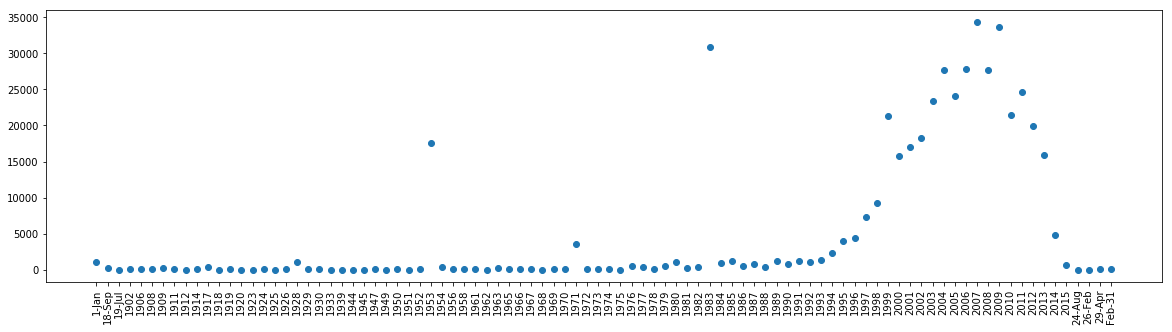

In [60]:
plt.figure(figsize = (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls,'o')

## Question 3: Answer Question 2 for Software Category

In [58]:
ls_software = []
for i in list(df_dropped['founded_at'].sort_values().unique()):
    ls_software.append(df_dropped[(df_dropped['founded_at'] == i) & (df_dropped['category_list'] == 'Software')]['funding_total_usd'].sum())

print(ls_software)


[68.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 10.0, 0.0, 0.0, 0.0, 11.4, 0.0, 0.0, 0.0, 0.0, 0.5, 6.0, 0.0, 0.0, 10.0, 0.0, 4.5, 25.0, 0.0, 13.0, 0.0, 2.5726, 12.0, 0.75, 330.2, 0.0, 0.0, 288.3, 1030.5, 104.0, 346.0, 30127.201999999997, 200.26204800000002, 101.729971, 236.38709300000002, 66.680511, 114.068238, 246.649674, 190.7, 344.546725, 157.02749999999997, 123.93339999999999, 284.2, 722.272222, 1218.3065430000001, 1403.4045914199999, 2995.954001399, 6851.748235581001, 5274.368905, 3170.162111884, 3520.6371440000003, 9759.921296249999, 8078.887584, 6230.730723000001, 6664.218580000001, 8051.633184, 8089.574015, 9883.793102, 6659.123789, 8531.500703976, 8183.62137026, 4727.556383104, 1324.721404466, 159.1, 0.0, 0.0, 0.0, 0.0]


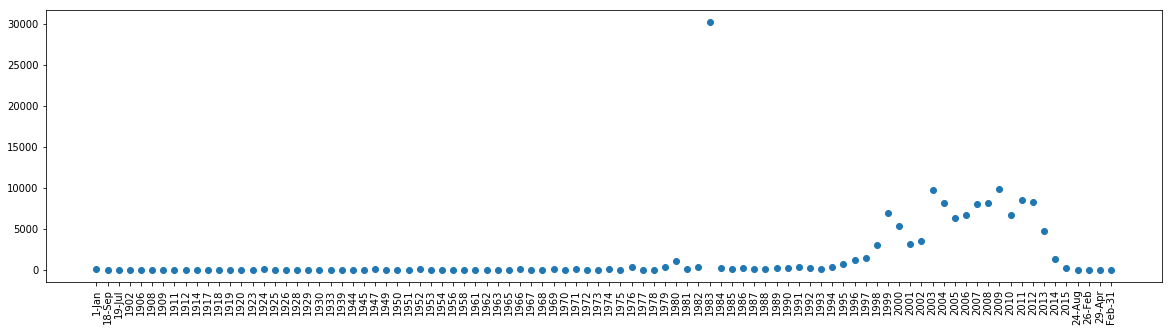

In [61]:
plt.figure(figsize = (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(df_dropped['founded_at'].sort_values().unique()), ls_software,'o')

# Regardless of the year, how much fund does exist for Automation, Business, ...? 

In [69]:
df_dropped.groupby('category_list')['funding_total_usd'].sum()

category_list
Automation            559.024294
Business             1422.426471
Communication        4052.314321
Construction          416.866774
Education           11273.229054
Employment            120.340000
Entertainment        8277.877143
Entrepreneur            1.545000
Finance             29572.705186
Gadget                  7.500000
Games                4853.158856
Hardware            33107.846342
Health              24640.058284
Industrial             44.305000
Management           3273.054044
Manufacturing       29928.799992
Marketing           27710.328309
Mobile              10129.438422
Pharmaceuticals      1237.935911
Services            26759.153986
Software           145997.345649
Sports               2070.726740
Style                 244.720695
Technology          86163.164572
Travel                327.289249
food                 1854.450244
Name: funding_total_usd, dtype: float64

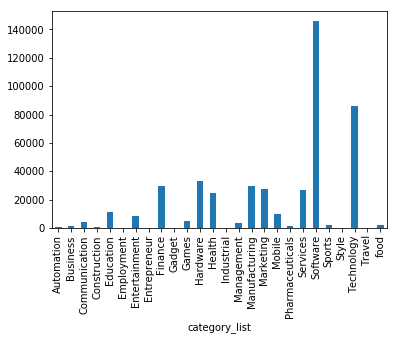

In [78]:
df_dropped.groupby('category_list')['funding_total_usd'].sum().plot(kind='bar')

In [70]:
print(sum(ls_software))

145997.34564934
